### Import modules

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns; sns.set()

C:\Users\luisr\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


### Custom functions

In [ ]:
def spread_col(df, col_name, prefix=None):
    col = df[col_name].fillna('').apply(lambda item: item.split(', '))
    col_unique = np.unique(col.sum())
    col_df = []
    for item in col_unique:
        col_df.append([int(item in value) for value in col])
    col_names = col_unique[:]
    if prefix is not None:
        col_names = col_name + prefix + pd.Series(col_names)
    return pd.DataFrame(col_df, index=col_names).T

In [ ]:
def spread_cols(df, cols, concat=True, prefix=' - '):
    dfs = []
    for col_name in cols:
        dfs.append(spread_col(df, col_name, prefix))
    if concat:
        return pd.concat([df] + dfs, axis=1)
    return pd.concat(dfs, axis=1)

### Load datasets

In [78]:
import os

os.listdir('Dados') # Show paths

['FF_BASELEMTO_ATUALIZADA_2011-2021 (1).xlsx',
 'Mapa de Conflitos no Brasil.csv']

In [72]:
path_ts = 'Dados/FF_BASELEMTO_ATUALIZADA_2011-2021 (1).xlsx'

ts = pd.read_excel(path_ts)

path_conf = 'Dados/Mapa de Conflitos no Brasil.csv'

conf = pd.read_csv(path_conf)

---
## Explortory Data Analysis

In [126]:
conf_spread = spread_cols(conf, cols=conf.columns[1:], concat=True, prefix=' - ')

#### Columns

In [155]:
conf.columns

Index(['Nome', 'UF', 'Município', 'Populações',
       'Atividades Geradoras do Conflito', 'Danos à Saúde',
       'Impactos Socioambientais'],
      dtype='object')

### Records per category

In [178]:
sns.set(palette='Purples_r')

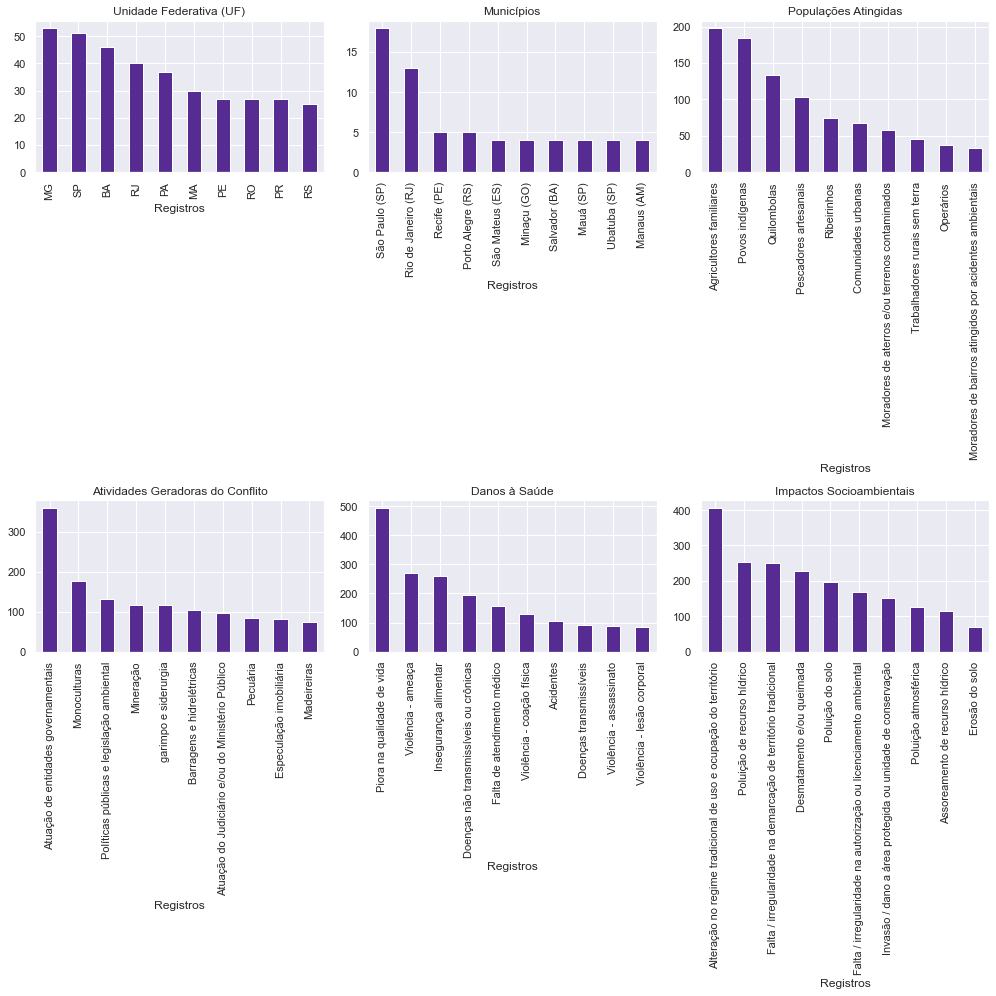

In [179]:
fig, axs = plt.subplots(2, 3, figsize=(14, 14), tight_layout=True)

conf['UF'].value_counts().head(10).plot.bar(ax=axs[0][0])
ax=axs[0][0].set(title='Unidade Federativa (UF)', xlabel='Registros')

conf['Município'].value_counts().head(10).plot.bar(ax=axs[0][1])
ax=axs[0][1].set(title='Municípios', xlabel='Registros')

spread_col(conf, 'Populações').sum().nlargest(10).plot.bar(ax=axs[0][2]);
ax=axs[0][2].set(title='Populações Atingidas', xlabel='Registros')

spread_col(conf, 'Atividades Geradoras do Conflito').sum().nlargest(10).plot.bar(ax=axs[1][0]);
ax=axs[1][0].set(title='Atividades Geradoras do Conflito', xlabel='Registros')

spread_col(conf, 'Danos à Saúde').sum().nlargest(10).plot.bar(ax=axs[1][1]);
ax=axs[1][1].set(title='Danos à Saúde', xlabel='Registros')

spread_col(conf, 'Impactos Socioambientais').sum().nlargest(10).plot.bar(ax=axs[1][2]);
ax=axs[1][2].set(title='Impactos Socioambientais', xlabel='Registros')

plt.show()